# Weather Data Classification using scikit-learn

Importing the Necessary Libraries

First we import the necessary libraries of the python for demostration of the Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

Read the data of the weather from the csv file using read_csv function of pandas dataframe 

In [ ]:
data = pd.read_csv('daily_weather.csv')

## Daily Weather Data Description


The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Let's now check all the columns in the data.

Know about various columns in the dataset.

In [ ]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


Checking is there exists null values in the dataset or not

In [ ]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


#### Data Cleaning Steps

We will not need to number for each row so we can clean it.

Data Cleaning process --> As number column contains unique values which can not help us making any decision

In [ ]:
data.drop(["number"], axis=1, inplace=True)

Removing the rows which contains the null values

In [ ]:
data = data.dropna()

Calculating the amount of data or say number of rows in the dataset after removing the rows containg null values

In [ ]:
after_rows = data.shape[0]
print(after_rows)

1064


Filter the values which contains more than 24.99 relative humidity at 3pm.

In [ ]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >24.99) *1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [ ]:
y = clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [ ]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


#### Use 9am Sensor Signals as Features to Predict Humidity at 3pm

Storing all the Morning features other than Humidity at 3 pm in the morning feature

In [ ]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
                    'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
                    'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

Copying the values from the clean_data dataset to new dataset x which only consist of the Morning Feature Data

In [ ]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [ ]:
y.columns

Index(['high_humidity_label'], dtype='object')

### Perform Test and Train split

By using train_test_split we have split the data into traing dataset and testing datasets.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

### Fit on Train Set

We have made a classifier for making the Decision Tree and to train the data using this classifier

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

### Predict on Test Set


Using humidity_classifier we have predicted the value for the X_test and stored it to y_predicted

In [ ]:
y_predicted = humidity_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int64

### Measure Accuracy of the Classifier

Checking our accuracy of the model using accuracy_score function from sklearn metrics which in this case is with around 90% accuracy

In [ ]:
accuracy_score(y_test,y_predicted)*100

90.05681818181817

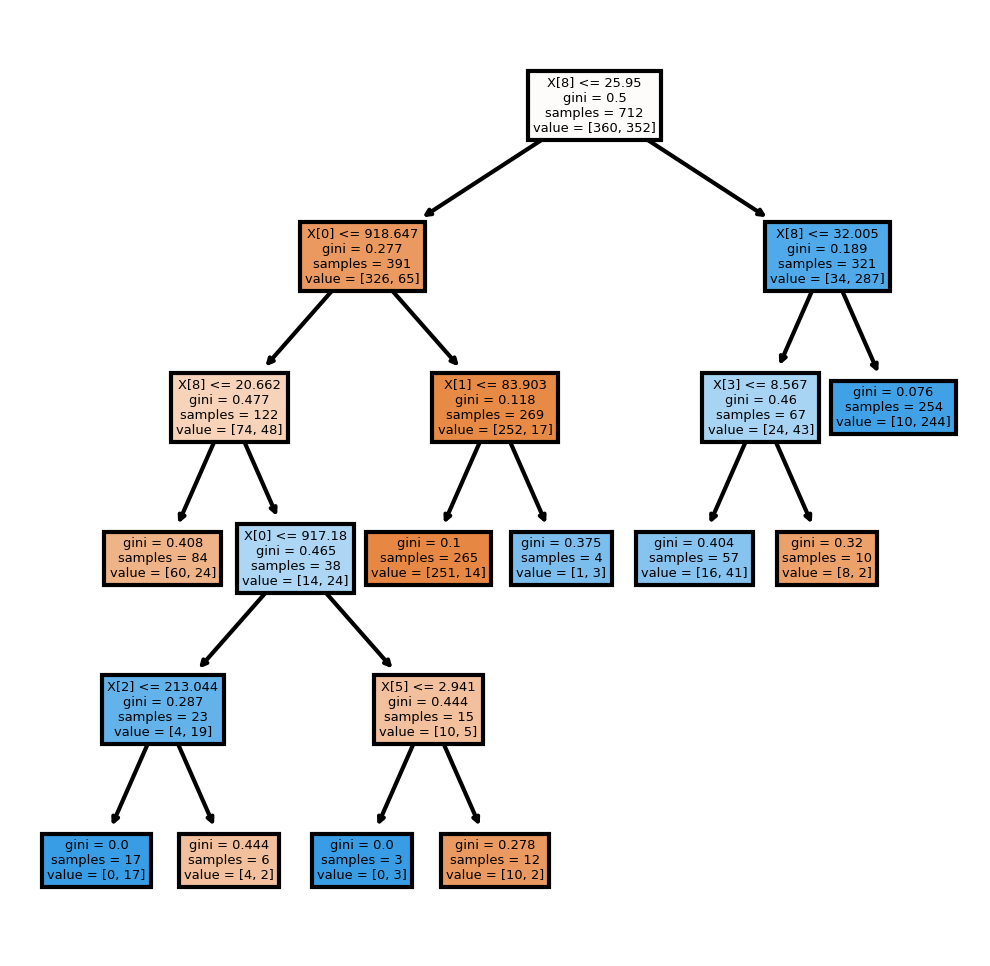

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(humidity_classifier, filled = True);
fig.savefig('img.png')